In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pydicom
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
from glob import glob

##Import any other packages you may need here

EDA is open-ended, and it is up to you to decide how to look at different ways to slice and dice your data. A good starting point is to look at the requirements for the FDA documentation in the final part of this project to guide (some) of the analyses you do. 

This EDA should also help to inform you of how pneumonia looks in the wild. E.g. what other types of diseases it's commonly found with, how often it is found, what ages it affects, etc. 

Note that this NIH dataset was not specifically acquired for pneumonia. So, while this is a representation of 'pneumonia in the wild,' the prevalence of pneumonia may be different if you were to take only chest x-rays that were acquired in an ER setting with suspicion of pneumonia. 

Perform the following EDA:
* The patient demographic data such as gender, age, patient position,etc. (as it is available)
* The x-ray views taken (i.e. view position)
* The number of cases including: 
    * number of pneumonia cases,
    * number of non-pneumonia cases
* The distribution of other diseases that are comorbid with pneumonia
* Number of disease per patient 
* Pixel-level assessments of the imaging data for healthy & disease states of interest (e.g. histograms of intensity values) and compare distributions across diseases.

Note: use full NIH data to perform the first a few EDA items and use `sample_labels.csv` for the pixel-level assassements. 

Also, **describe your findings and how will you set up the model training based on the findings.**

In [2]:
## Below is some helper code to read data for you.
## Load NIH data
all_xray_df = pd.read_csv('/data/Data_Entry_2017.csv')
all_xray_df.sample(3)

## Load 'sample_labels.csv' data for pixel level assessments
sample_df = pd.read_csv('sample_labels.csv')


In [3]:
all_xray_df.isna().sum()

Image Index                         0
Finding Labels                      0
Follow-up #                         0
Patient ID                          0
Patient Age                         0
Patient Gender                      0
View Position                       0
OriginalImage[Width                 0
Height]                             0
OriginalImagePixelSpacing[x         0
y]                                  0
Unnamed: 11                    112120
dtype: int64

In [4]:
all_xray_df = all_xray_df.drop(columns="Unnamed: 11", axis = 1)

In [5]:
all_xray_df.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800


In [6]:
all_xray_df

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168


In [7]:
all_labels = np.unique(list(chain(*all_xray_df['Finding Labels'].str.split('|').tolist())))
for i in all_labels:
    all_xray_df[i] = all_xray_df['Finding Labels'].map(lambda x : 1 if i in x else 0)

Text(0.5, 1.0, 'Histogram of Patient Age Distribution')

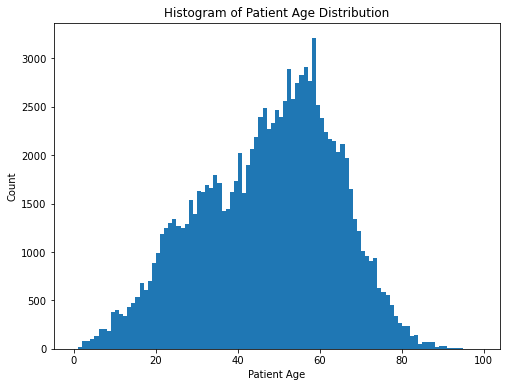

In [8]:
plt.figure(figsize = (8, 6))
_ = plt.hist(all_xray_df['Patient Age'], bins = np.arange(0, 100, 1))
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title('Histogram of Patient Age Distribution')

In [9]:
all_xray_df[all_xray_df['Patient Age'] > 100]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
20852,00005567_000.png,Effusion|Pneumonia,0,5567,412,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,1,0
46965,00011973_002.png,Edema,2,11973,414,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,0,0
48284,00012238_010.png,No Finding,10,12238,148,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
55742,00013950_000.png,No Finding,0,13950,148,M,PA,2964,2939,0.143,...,0,0,0,0,0,1,0,0,0,0
58650,00014520_026.png,Infiltration|Mass,26,14520,150,M,PA,2992,2991,0.143,...,0,0,0,1,1,0,0,0,0,0
62929,00015558_000.png,No Finding,0,15558,149,M,PA,2992,2991,0.143,...,0,0,0,0,0,1,0,0,0,0
74884,00018366_044.png,Pneumothorax,44,18366,152,F,PA,2302,2991,0.143,...,0,0,0,0,0,0,0,0,0,1
78795,00019346_000.png,Infiltration,0,19346,151,F,PA,2678,2774,0.143,...,0,0,0,1,0,0,0,0,0,0
84810,00020900_002.png,No Finding,2,20900,411,M,AP,3056,2544,0.139,...,0,0,0,0,0,1,0,0,0,0
85404,00021047_002.png,Mass|Pleural_Thickening,2,21047,412,M,AP,3056,2544,0.139,...,0,0,0,0,1,0,0,1,0,0


- There are patients with age more than 100 years and some even have an age of 400+ years. This seems to be some typo in the dataset.

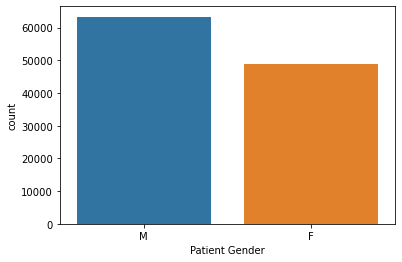

In [10]:
sns.countplot(all_xray_df['Patient Gender'])

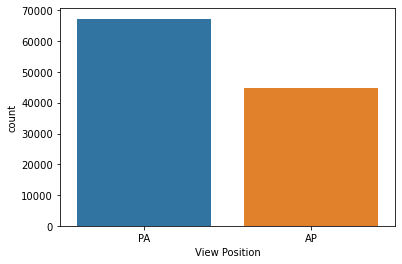

In [11]:
sns.countplot(all_xray_df['View Position'])

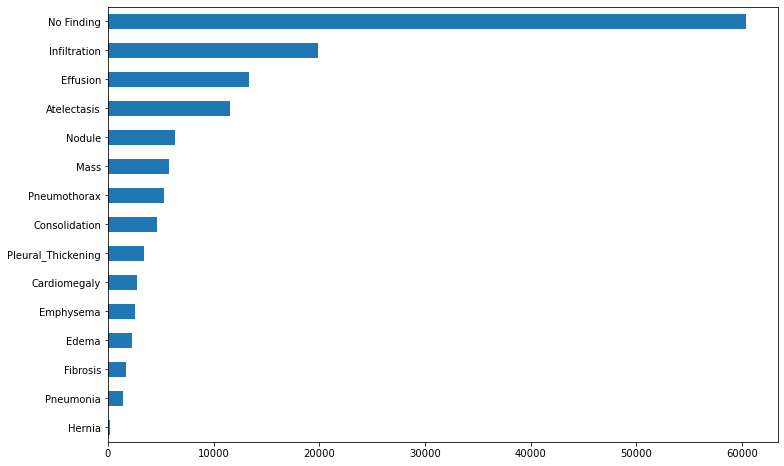

In [12]:
plt.figure(figsize = (12, 8))
all_xray_df[all_labels].sum().sort_values(ascending = True).plot(kind = 'barh')

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


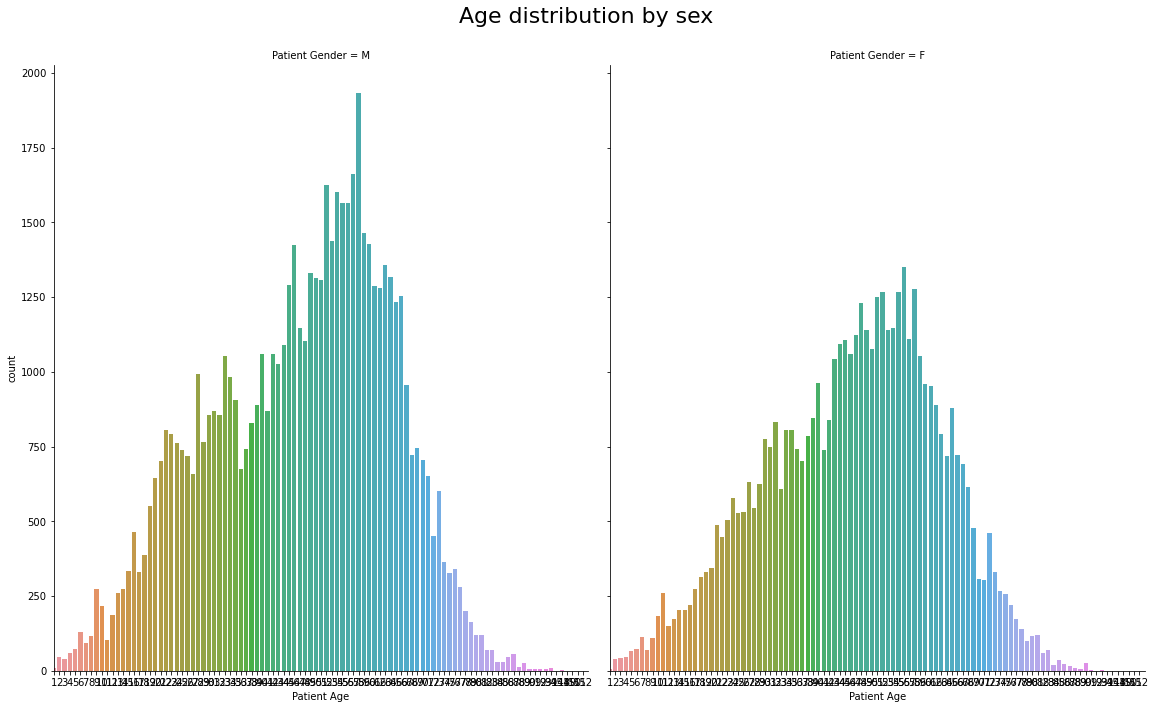

In [13]:
g = sns.catplot(x = 'Patient Age', col = 'Patient Gender', data = all_xray_df, kind = 'count', size = 10, aspect = 0.8)
g.axes[0,0].set_xlim(0,100)
g.axes[0, 0].set_xticks(np.arange(0, 100, 1));

g.fig.suptitle('Age distribution by sex',fontsize=22);
g.fig.subplots_adjust(top=.9)

Text(0.5, 1.05, 'Correlation Matrix')

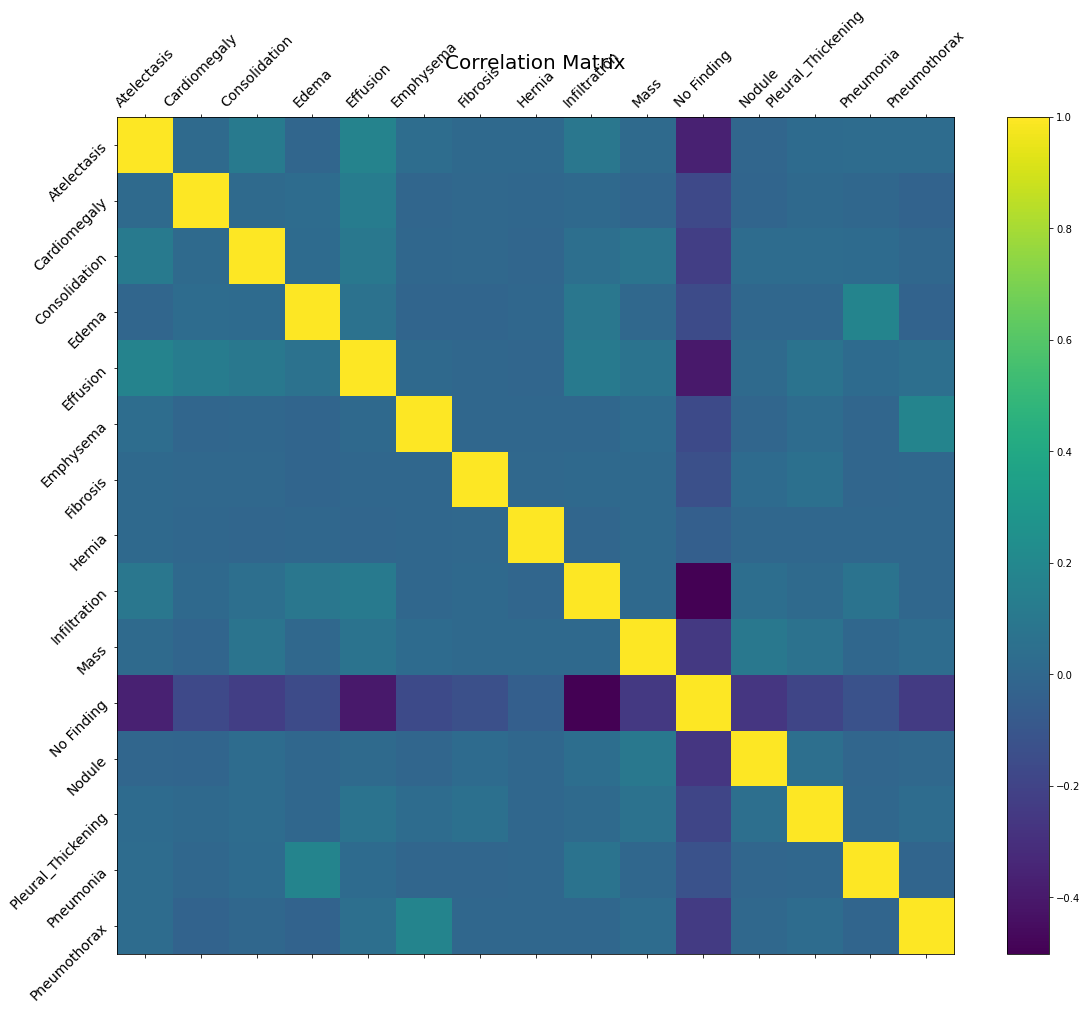

In [14]:
f = plt.figure(figsize = (19, 15))
plt.matshow(all_xray_df[all_labels].corr(), fignum=f.number)
plt.xticks(ticks = range(all_xray_df[all_labels].shape[1]), labels=all_xray_df[all_labels].columns, fontsize = 14, rotation = 45)
plt.yticks(ticks = range(all_xray_df[all_labels].shape[1]), labels=all_xray_df[all_labels].columns, fontsize = 14, rotation = 45)
cb = plt.colorbar()
plt.title('Correlation Matrix', fontsize = 20)

# Pneumonia EDA

In [15]:
all_xray_df.groupby('Pneumonia')['Pneumonia'].count()

Pneumonia
0    110689
1      1431
Name: Pneumonia, dtype: int64

Text(0, 0.5, 'Count')

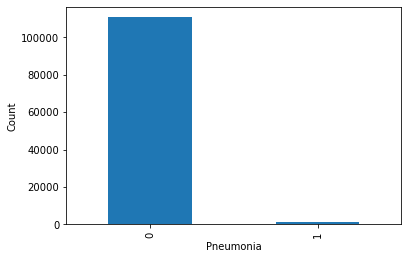

In [16]:
all_xray_df.groupby('Pneumonia')['Pneumonia'].count().plot(kind = 'bar')
plt.ylabel('Count')

In [17]:
all_xray_df.groupby('Pneumonia')['Patient Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pneumonia,,,,,,,,
0,110689.0,46.926985,16.791759,1.0,35.0,49.0,59.0,414.0
1,1431.0,44.927324,20.129866,2.0,31.0,46.0,59.0,412.0


Text(0.5, 1.0, 'Normalized Histogram of Patient Age Distribution with Pneumonia and non-Pneumonia')

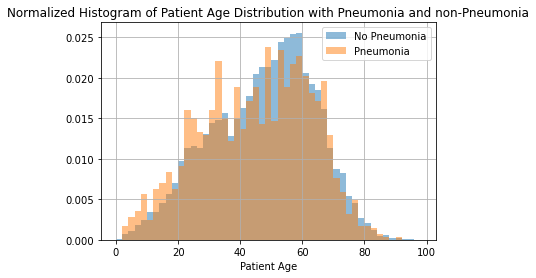

In [18]:
all_xray_df.groupby('Pneumonia')['Patient Age'].hist(bins = np.arange(0, 100, 2), density = True, alpha = 0.5)
plt.xlabel('Patient Age')
plt.legend(['No Pneumonia', 'Pneumonia'])
plt.title('Normalized Histogram of Patient Age Distribution with Pneumonia and non-Pneumonia')

In [19]:
pneumonia_df = all_xray_df[all_xray_df['Pneumonia'] == 1]
no_pneumonia_df = all_xray_df[all_xray_df['Pneumonia'] == 0]

In [20]:
pneumonia_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Emphysema,Fibrosis,Hernia,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
48,00000013_010.png,Effusion|Pneumonia|Pneumothorax,10,13,60,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,1,1
126,00000032_012.png,Atelectasis|Consolidation|Edema|Pneumonia,12,32,55,F,AP,2500,2048,0.168,...,0,0,0,0,0,0,0,0,1,0
253,00000056_000.png,Nodule|Pneumonia,0,56,76,M,PA,2500,2048,0.168,...,0,0,0,0,0,0,1,0,1,0
276,00000061_012.png,Edema|Effusion|Infiltration|Pleural_Thickening...,12,61,77,M,AP,3056,2544,0.139,...,0,0,0,1,0,0,0,1,1,0
279,00000061_015.png,Pneumonia,15,61,77,M,AP,3056,2544,0.139,...,0,0,0,0,0,0,0,0,1,0


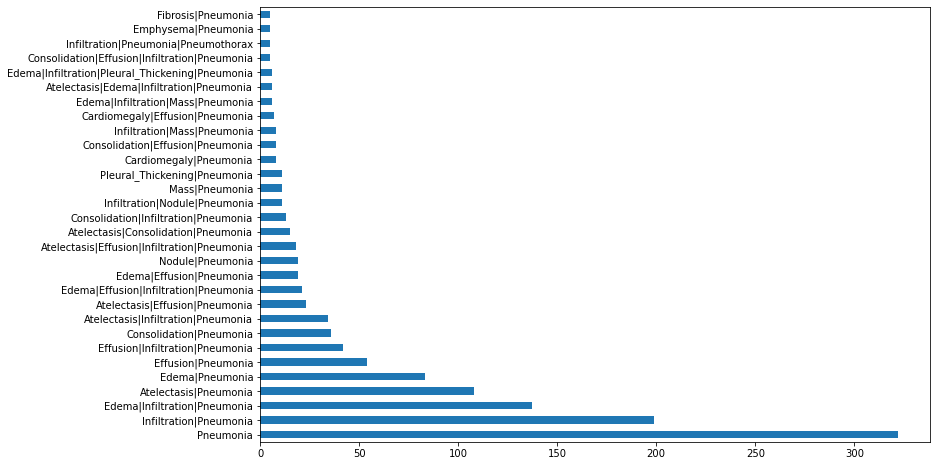

In [21]:
plt.figure(figsize=(12, 8))
pneumonia_df['Finding Labels'].value_counts()[:30].plot(kind = 'barh')

Text(0.5, 1.0, 'Pneumonia Sex Distribution')

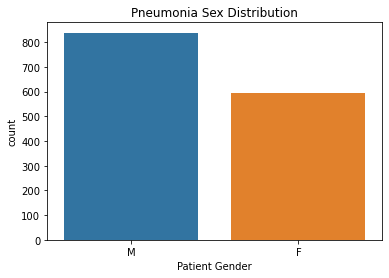

In [22]:
sns.countplot(pneumonia_df['Patient Gender'])
plt.title('Pneumonia Sex Distribution')

Text(0.5, 1.0, 'Histogram of Patient Age Distribution with Pneumonia')

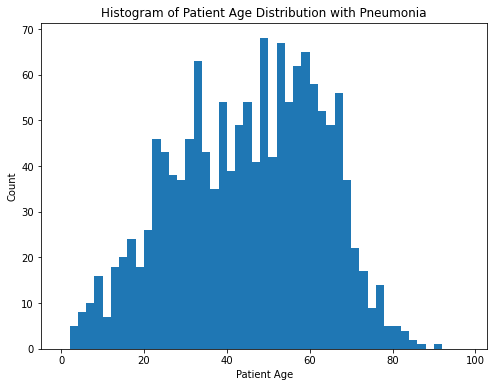

In [23]:
plt.figure(figsize = (8, 6))
_ = plt.hist(pneumonia_df['Patient Age'], bins = np.arange(0, 100, 2))
plt.xlabel('Patient Age')
plt.ylabel('Count')
plt.title('Histogram of Patient Age Distribution with Pneumonia')

In [24]:
img_list = glob('*.dcm')

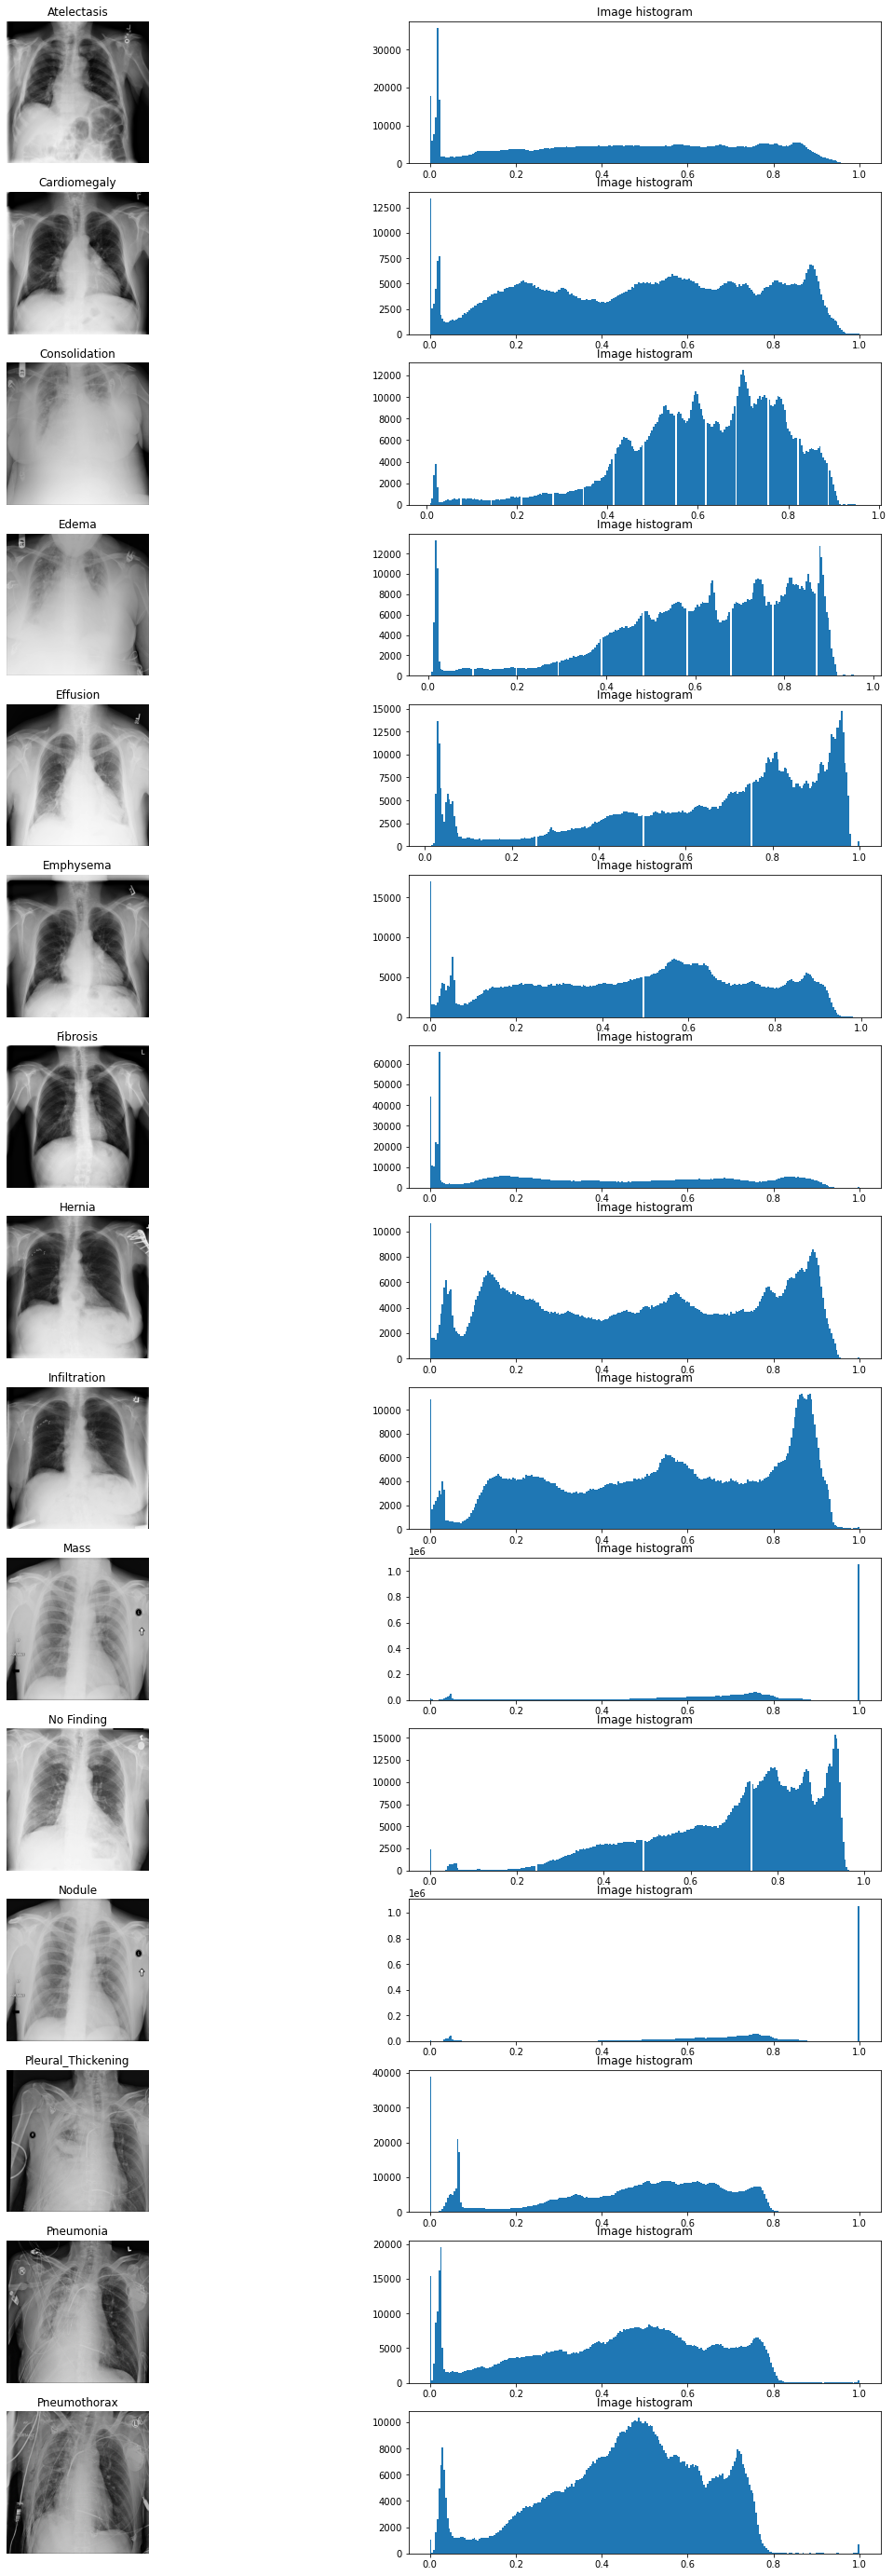

In [26]:
path = "/data/images_001/images/"
fig, axs = plt.subplots(len(all_labels), 2, figsize = (20, 50))
i = 0
for disease in all_labels:
    img_name = all_xray_df[all_xray_df[disease] == 1]['Image Index'].reset_index(drop = True)[0]
    img_path = os.path.join(path, img_name)
    if not os.path.exists(img_path):  continue
    img = plt.imread(path + img_name)
    axs[i, 0].imshow(img, cmap = 'gray')
    axs[i, 0].set_title(disease)
    axs[i, 1].hist(img.ravel(), bins = 256)
    axs[i, 1].set_title('Image histogram')
    axs[i, 0].axis('off')
    i += 1

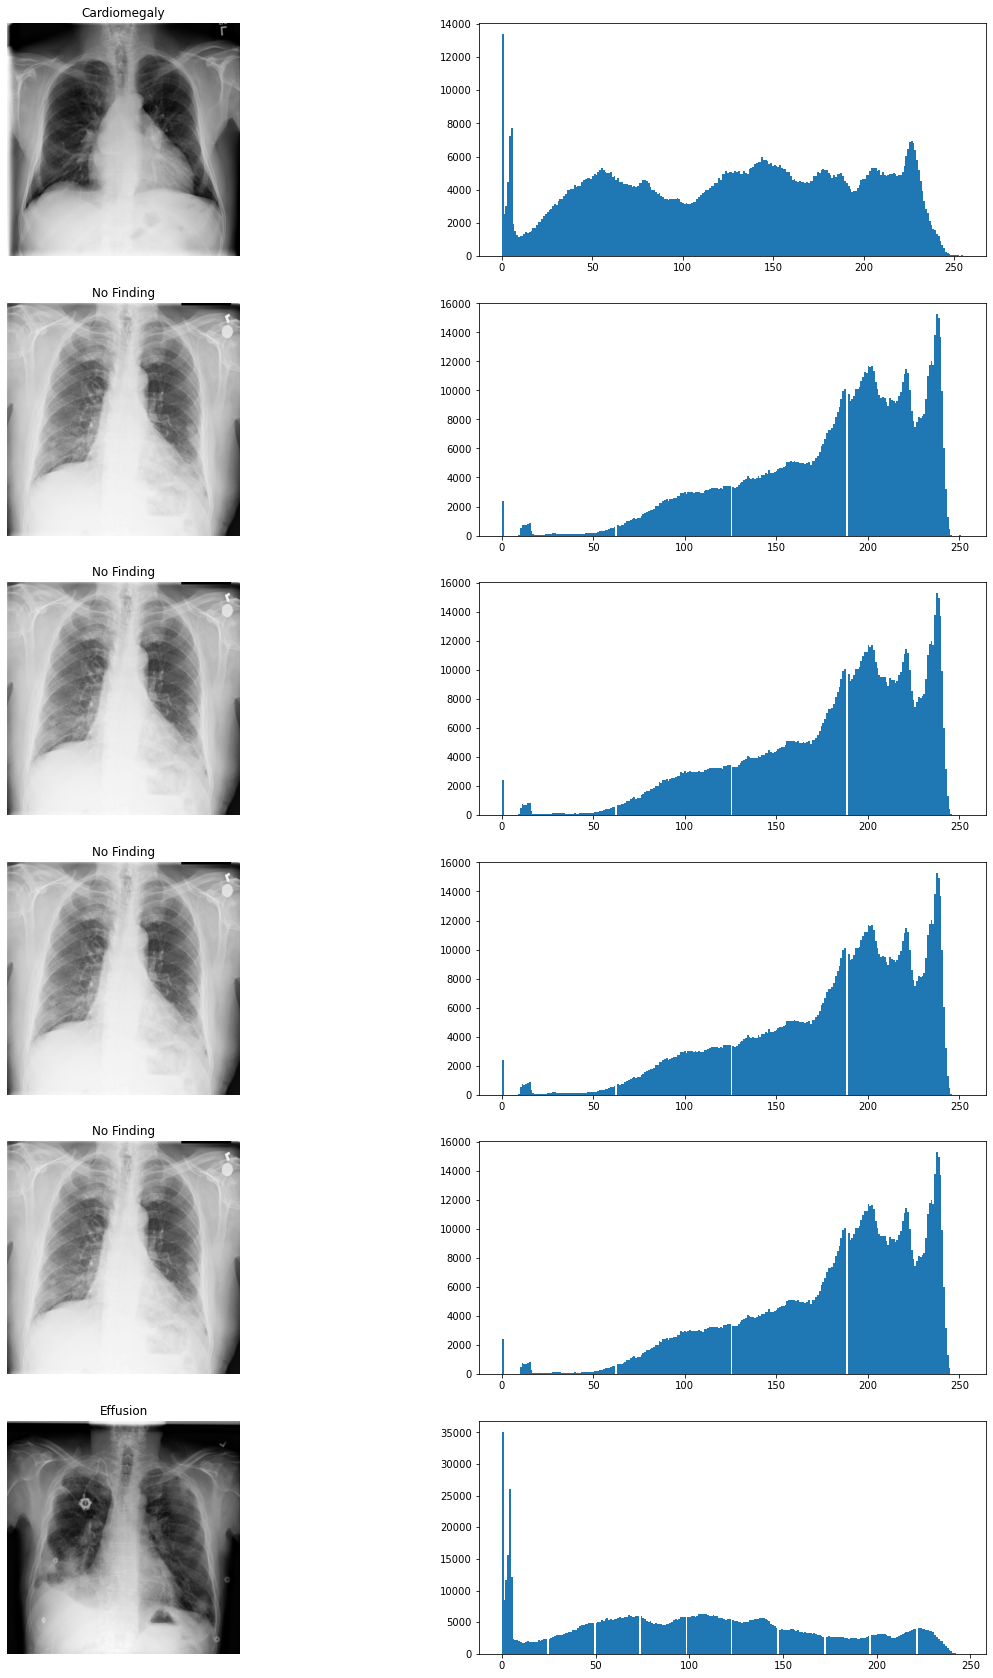

In [27]:
fig, axs = plt.subplots(len(img_list), 2, figsize = (20, 30))
for i, path in enumerate(img_list):
    dcm = pydicom.dcmread(path)
    label = dcm.StudyDescription
    axs[i, 0].imshow(dcm.pixel_array, cmap = 'gray')
    axs[i, 0].set_title(label)
    axs[i, 1].hist(dcm.pixel_array.ravel(), bins = 256)
    axs[i, 0].axis('off')

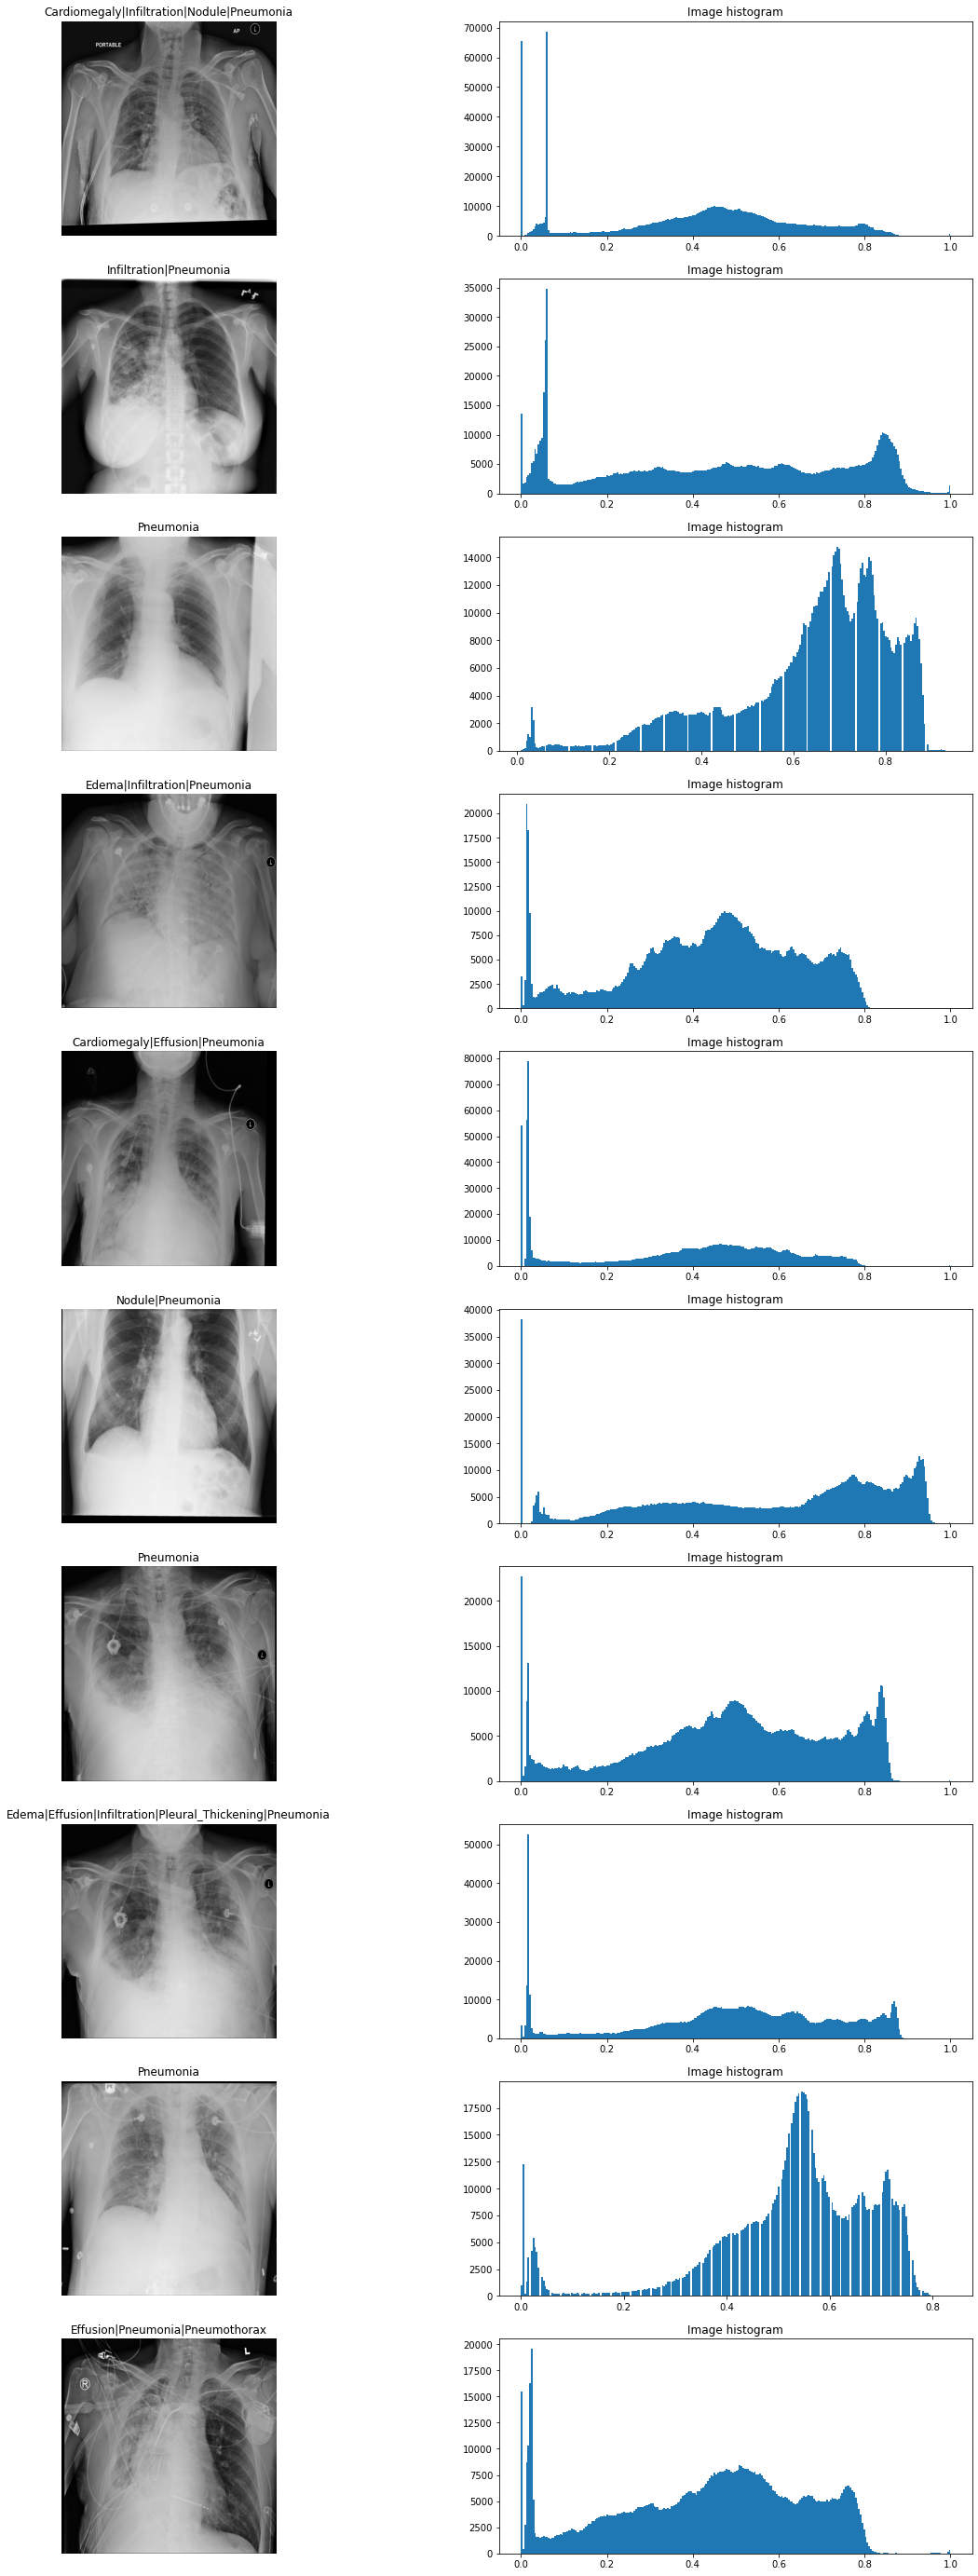

In [28]:
path = "/data/images_001/images/"
fig, axs = plt.subplots(10, 2, figsize = (20, 50))
i = 0
for idx, row in pneumonia_df[:20].sample(10).iterrows():
    img_path = os.path.join(path, row['Image Index'])
    if not os.path.exists(img_path):  continue
    img = plt.imread(img_path)
    label = row['Finding Labels']
    axs[i, 0].imshow(img, cmap = 'gray')
    axs[i, 0].set_title(label)
    axs[i, 1].hist(img.ravel(), bins = 256)
    axs[i, 1].set_title('Image histogram')
    axs[i, 0].axis('off')
    i += 1

## Findings
* There are some outliers in Patient Age(400 year) column which need to be filtered out.
* The age is normally distributed.
* The images with dataset is highly imbalanced for Pneumonia. There are very few cases of Pnumonia. We can use data augmentation to address it.
* There are more number of male patients with Pneumonia than females.
* Infiltration and Edema seems to be two most occuring diseases with Pneumonia.
* No finding intensity plot mostly shows bright intensities.
* Intensity plot of Pneumonia shows most of the values consolidated in the middle.
* The intensity distribution of Infiltration and Effusion seems to be really close to Pneumonia.